In [22]:
import os
import numpy as np
from matplotlib import pyplot as plt

## Create a test file

In [23]:
X = np.random.rand(11,7)
X = X.flatten()
Y = np.random.rand(11,7)
Y = Y.flatten()
Z = np.random.rand(11,7)
Z = Z.flatten()
O1 = np.random.rand(11,7)
O1 = O1.flatten()
O2 = np.random.rand(11,7)
O2 = O2.flatten()
O3 = np.random.rand(11,7)
O3 = O3.flatten()
O4 = np.random.rand(11,7)
O4 = O4.flatten()

M = np.array([X,Y,Z,O1,O2,O3,O4])
np.savetxt(f'test.dat', M.T,
            header='\n'.join([f'SizeX = {11000}', f'SizeY = {7000}',f'SizeZ = {0}',
            f'StepX = {1000}',f'StepY = {1000}',f'StepZ = {1000}']))


## Read it back
### Test the header comments

In [24]:
current_folder = os.getcwd()
file_path = os.path.join(current_folder,'test.dat')

nlines = 6
with open(file_path, 'r') as file: header_lines = [file.readline().strip() for _ in range(nlines)]  # Assuming 2 header lines

print("Header data:")
for header_line in header_lines:
    idx = header_line.find("=")
    print(f'{header_line[2:idx-1]} = {header_line[idx+2:]}')

Header data:
SizeX = 11000
SizeY = 7000
SizeZ = 0
StepX = 1000
StepY = 1000
StepZ = 1000


## Define MirrorScan class

In [8]:
class MirrorScan:
    def __init__(self):
        # Parameters
        self.center_point = None
        self.step_sizeX = None
        self.step_sizeY = None
        self.step_sizeZ = None

        self.sizeX = None
        self.sizeY = None
        self.sizeZ = None

        self.Nx = None
        self.Ny = None
        self.Nz = None

        # Data
        self.O1A = []
        self.O2A = []
        self.O3A = []
        self.O4A = []

        self.X = []
        self.Y = []
        self.Z = []

    def recalc_size(self):
        self.Nx = int(self.sizeX/self.step_sizeX)
        self.Ny = int(self.sizeY/self.step_sizeY)
        self.Nz = int(self.sizeZ/self.step_sizeZ)
        if self.Nz == 0:
            self.Nz = 1
        else:
            self.Nz = int(self.sizeZ/self.step_sizeZ)

    def create_array(self):
        self.O1A = np.zeros((self.Nz,self.Nx,self.Ny))
        self.O2A = np.zeros((self.Nz,self.Nx,self.Ny))
        self.O3A = np.zeros((self.Nz,self.Nx,self.Ny))
        self.O4A = np.zeros((self.Nz,self.Nx,self.Ny))

        self.X = np.zeros((self.Nz,self.Nx,self.Ny))
        self.Y = np.zeros((self.Nz,self.Nx,self.Ny))
        self.Z = np.zeros((self.Nz,self.Nx,self.Ny))

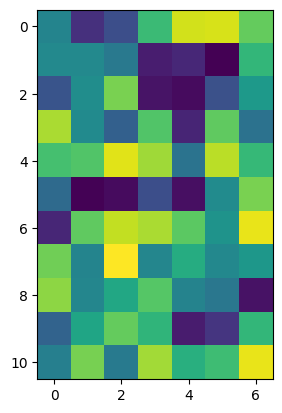

In [19]:
# Create a MirrorScan object
scan = MirrorScan()
for header_line in header_lines:
    idx = header_line.find("=")
    text = header_line[2:idx-1]
    number = int(header_line[idx+2:])
    if text == 'SizeX':
        scan.sizeX = number
    elif text == 'SizeY':
        scan.sizeY = number
    elif text == 'SizeZ':
        scan.sizeZ = number
    elif text == 'StepX':
        scan.step_sizeX = number
    elif text == 'StepY':
        scan.step_sizeY = number
    elif text == 'StepZ':
        scan.step_sizeZ = number

scan.recalc_size()

data = np.loadtxt(file_path, skiprows=len(header_lines))

scan.X = data[:,0]
scan.X = np.reshape(scan.X,(scan.Nz,scan.Nx,scan.Ny))
scan.Y = data[:,1]
scan.Y = np.reshape(scan.Y,(scan.Nz,scan.Nx,scan.Ny))
scan.Z = data[:,2]
scan.Z = np.reshape(scan.Z,(scan.Nz,scan.Nx,scan.Ny))
scan.O1A = data[:,3]
scan.O1A = np.reshape(scan.O1A,(scan.Nz,scan.Nx,scan.Ny))
scan.O2A = data[:,4]
scan.O2A = np.reshape(scan.O2A,(scan.Nz,scan.Nx,scan.Ny))
scan.O3A = data[:,5]
scan.O3A = np.reshape(scan.O3A,(scan.Nz,scan.Nx,scan.Ny))
scan.O4A = data[:,6]
scan.O4A = np.reshape(scan.O4A,(scan.Nz,scan.Nx,scan.Ny))

data_to_plot = scan.O2A[0,:,:]

plt.imshow(data_to_plot)
plt.show()

## Read a real measurement file and plot

Header data:
SizeX = 31000
SizeY = 31000
SizeZ = 0
StepX = 3000
StepY = 3000
StepZ = 1000


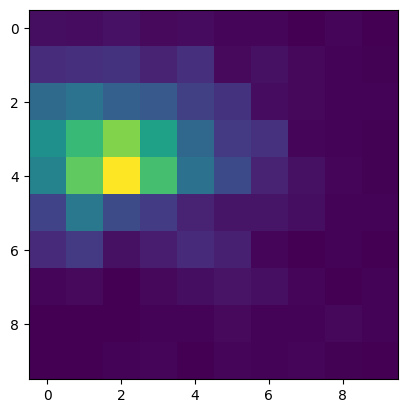

In [26]:
current_folder = os.getcwd()
file_path = os.path.join(current_folder,'2023.12.02-20.18_2D_Mirror_scan_31.0x31.0_3.0um.dat')

nlines = 6
with open(file_path, 'r') as file: header_lines = [file.readline().strip() for _ in range(nlines)]

print("Header data:")
for header_line in header_lines:
    idx = header_line.find("=")
    print(f'{header_line[2:idx-1]} = {header_line[idx+2:]}')

scan = MirrorScan()
for header_line in header_lines:
    idx = header_line.find("=")
    text = header_line[2:idx-1]
    number = int(header_line[idx+2:])
    if text == 'SizeX':
        scan.sizeX = number
    elif text == 'SizeY':
        scan.sizeY = number
    elif text == 'SizeZ':
        scan.sizeZ = number
    elif text == 'StepX':
        scan.step_sizeX = number
    elif text == 'StepY':
        scan.step_sizeY = number
    elif text == 'StepZ':
        scan.step_sizeZ = number

scan.recalc_size()

data = np.loadtxt(file_path, skiprows=len(header_lines))

scan.X = np.reshape(data[:,0],(scan.Nz,scan.Nx,scan.Ny))
scan.Y = np.reshape(data[:,1],(scan.Nz,scan.Nx,scan.Ny))
scan.Z = np.reshape(data[:,2],(scan.Nz,scan.Nx,scan.Ny))
scan.O1A = np.reshape(data[:,3],(scan.Nz,scan.Nx,scan.Ny))
scan.O2A = np.reshape(data[:,4],(scan.Nz,scan.Nx,scan.Ny))
scan.O3A = np.reshape(data[:,5],(scan.Nz,scan.Nx,scan.Ny))
scan.O4A = np.reshape(data[:,6],(scan.Nz,scan.Nx,scan.Ny))

data_to_plot = scan.O2A[0,:,:]

plt.imshow(data_to_plot)
plt.show()